****
# Introduction 
****

**This Notebook's goal is to successfully predict whether a person has Diabetes or not**

**If you liked this Notebook or you found this helpful Kindly Upvote :)**

****
# Reading and Displaying the Data 
****

In [1]:
# Importing
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df=pd.read_csv(r'/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


****
# Data Visualization #
****

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

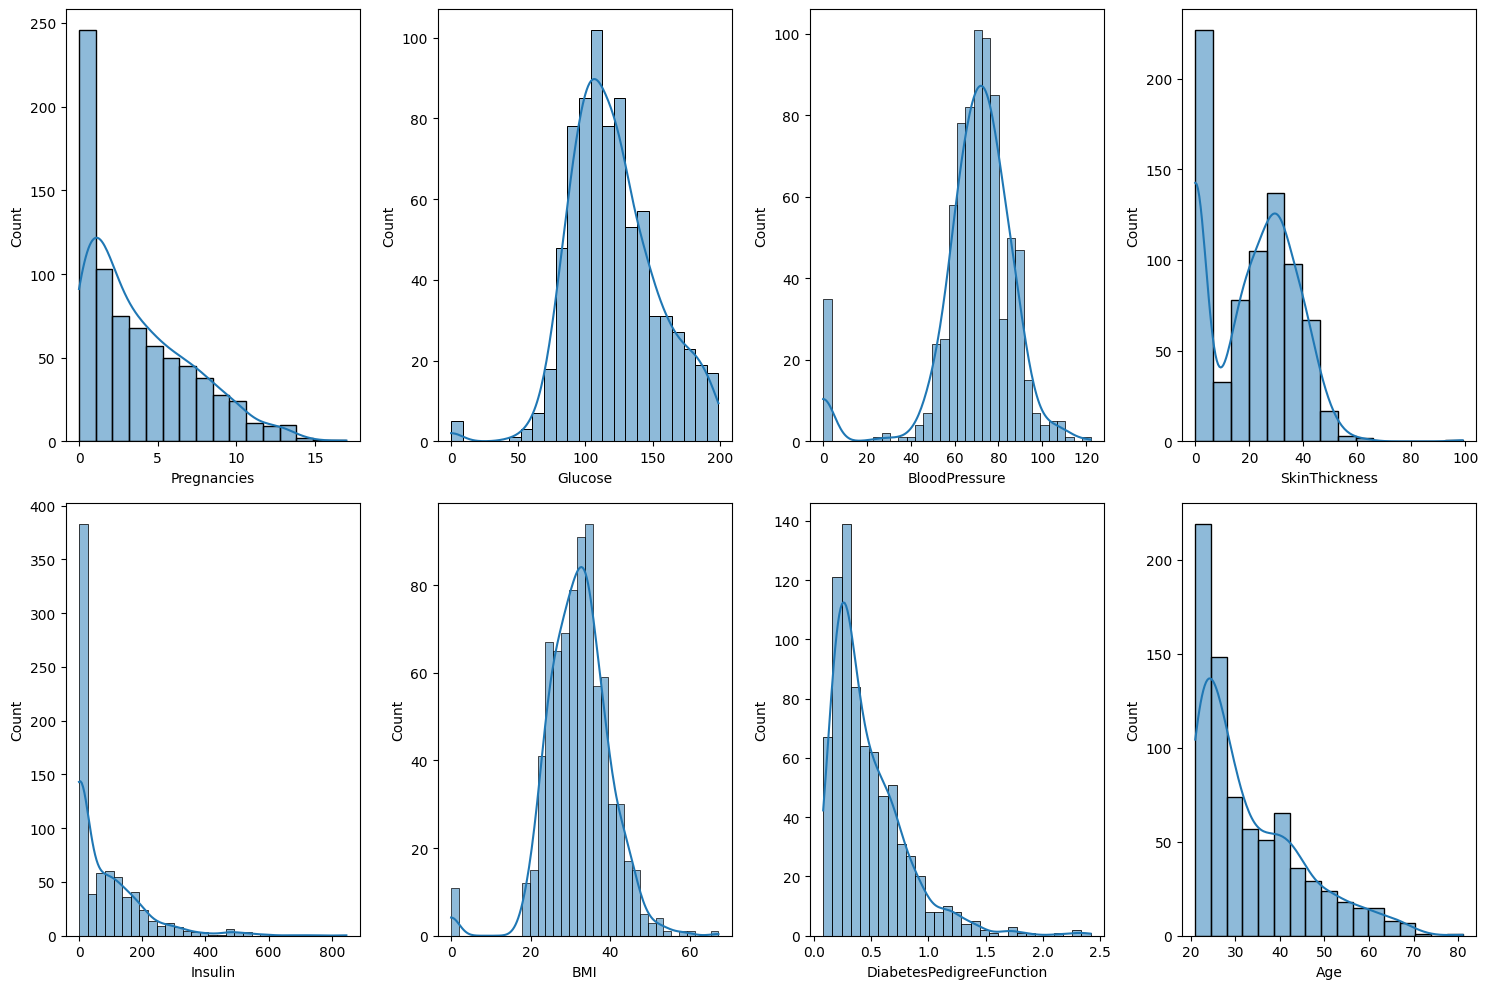

In [4]:
# Let us look at how our features are distributed

cols = df.columns[df.columns != 'Outcome']
fig,ax=plt.subplots(2,4,figsize=(15,10))
ax=ax.flatten()
i=0
for col in cols:
    sns.histplot(data=df,x=col,kde=True,ax=ax[i])
    i+=1
plt.tight_layout()
plt.show()

**Findings**

1. Pregnancies:


* Right-skewed distribution (majority of values between 0 and 6).
* Some higher values, but they are less frequent.

2. Glucose:


* Approximately normal distribution with slight right skew.
* Most values fall between 80 and 150.

3. Blood Pressure:


* Bell-shaped distribution but slightly right-skewed.
* Some lower values around 0, which might indicate missing or erroneous data.

4. Skin Thickness:


* Some outliers at 0, which may indicate missing values.
* Right-skewed distribution.

5. Insulin:


* Highly right-skewed distribution.
* A large number of zero values, indicating possible missing or imputed data.

6. BMI:


* Right-skewed, but mostly normally distributed.
* Some low outliers around 0, which might be missing values.

7. Diabetes Pedigree Function (DPF):


* Right-skewed with a long tail.
* Majority of values are below 1.0, but some extend beyond 2.0.

8. Age:


* Right-skewed distribution, as expected.
* Most patients are between 20 and 50 years old.


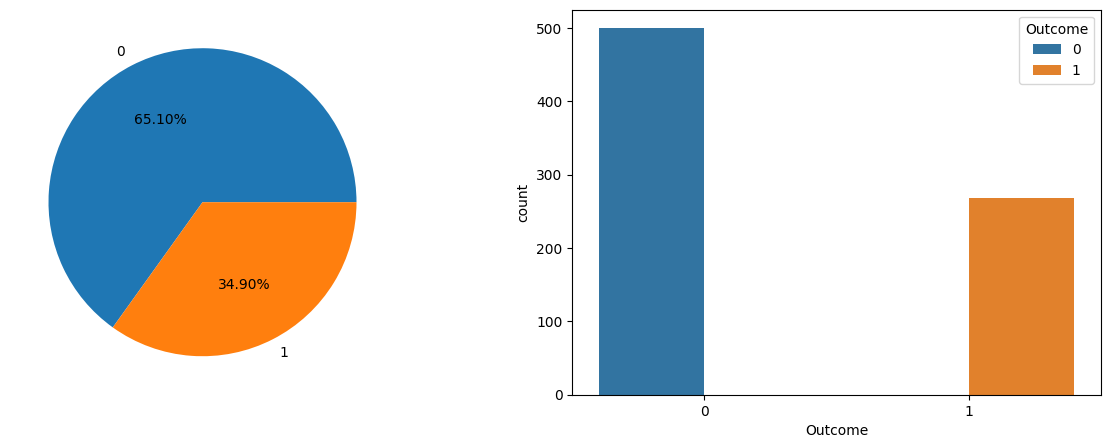

In [5]:
# let us look at out Target variable (Outcome)
fig,ax=plt.subplots(1,2,figsize=(15,5))
tdf=df['Outcome'].value_counts().reset_index()
ax[0].pie(x=tdf['count'],labels=tdf['Outcome'],autopct='%.2f%%')
sns.countplot(data=df,x='Outcome',ax=ax[1],hue='Outcome')
plt.show()

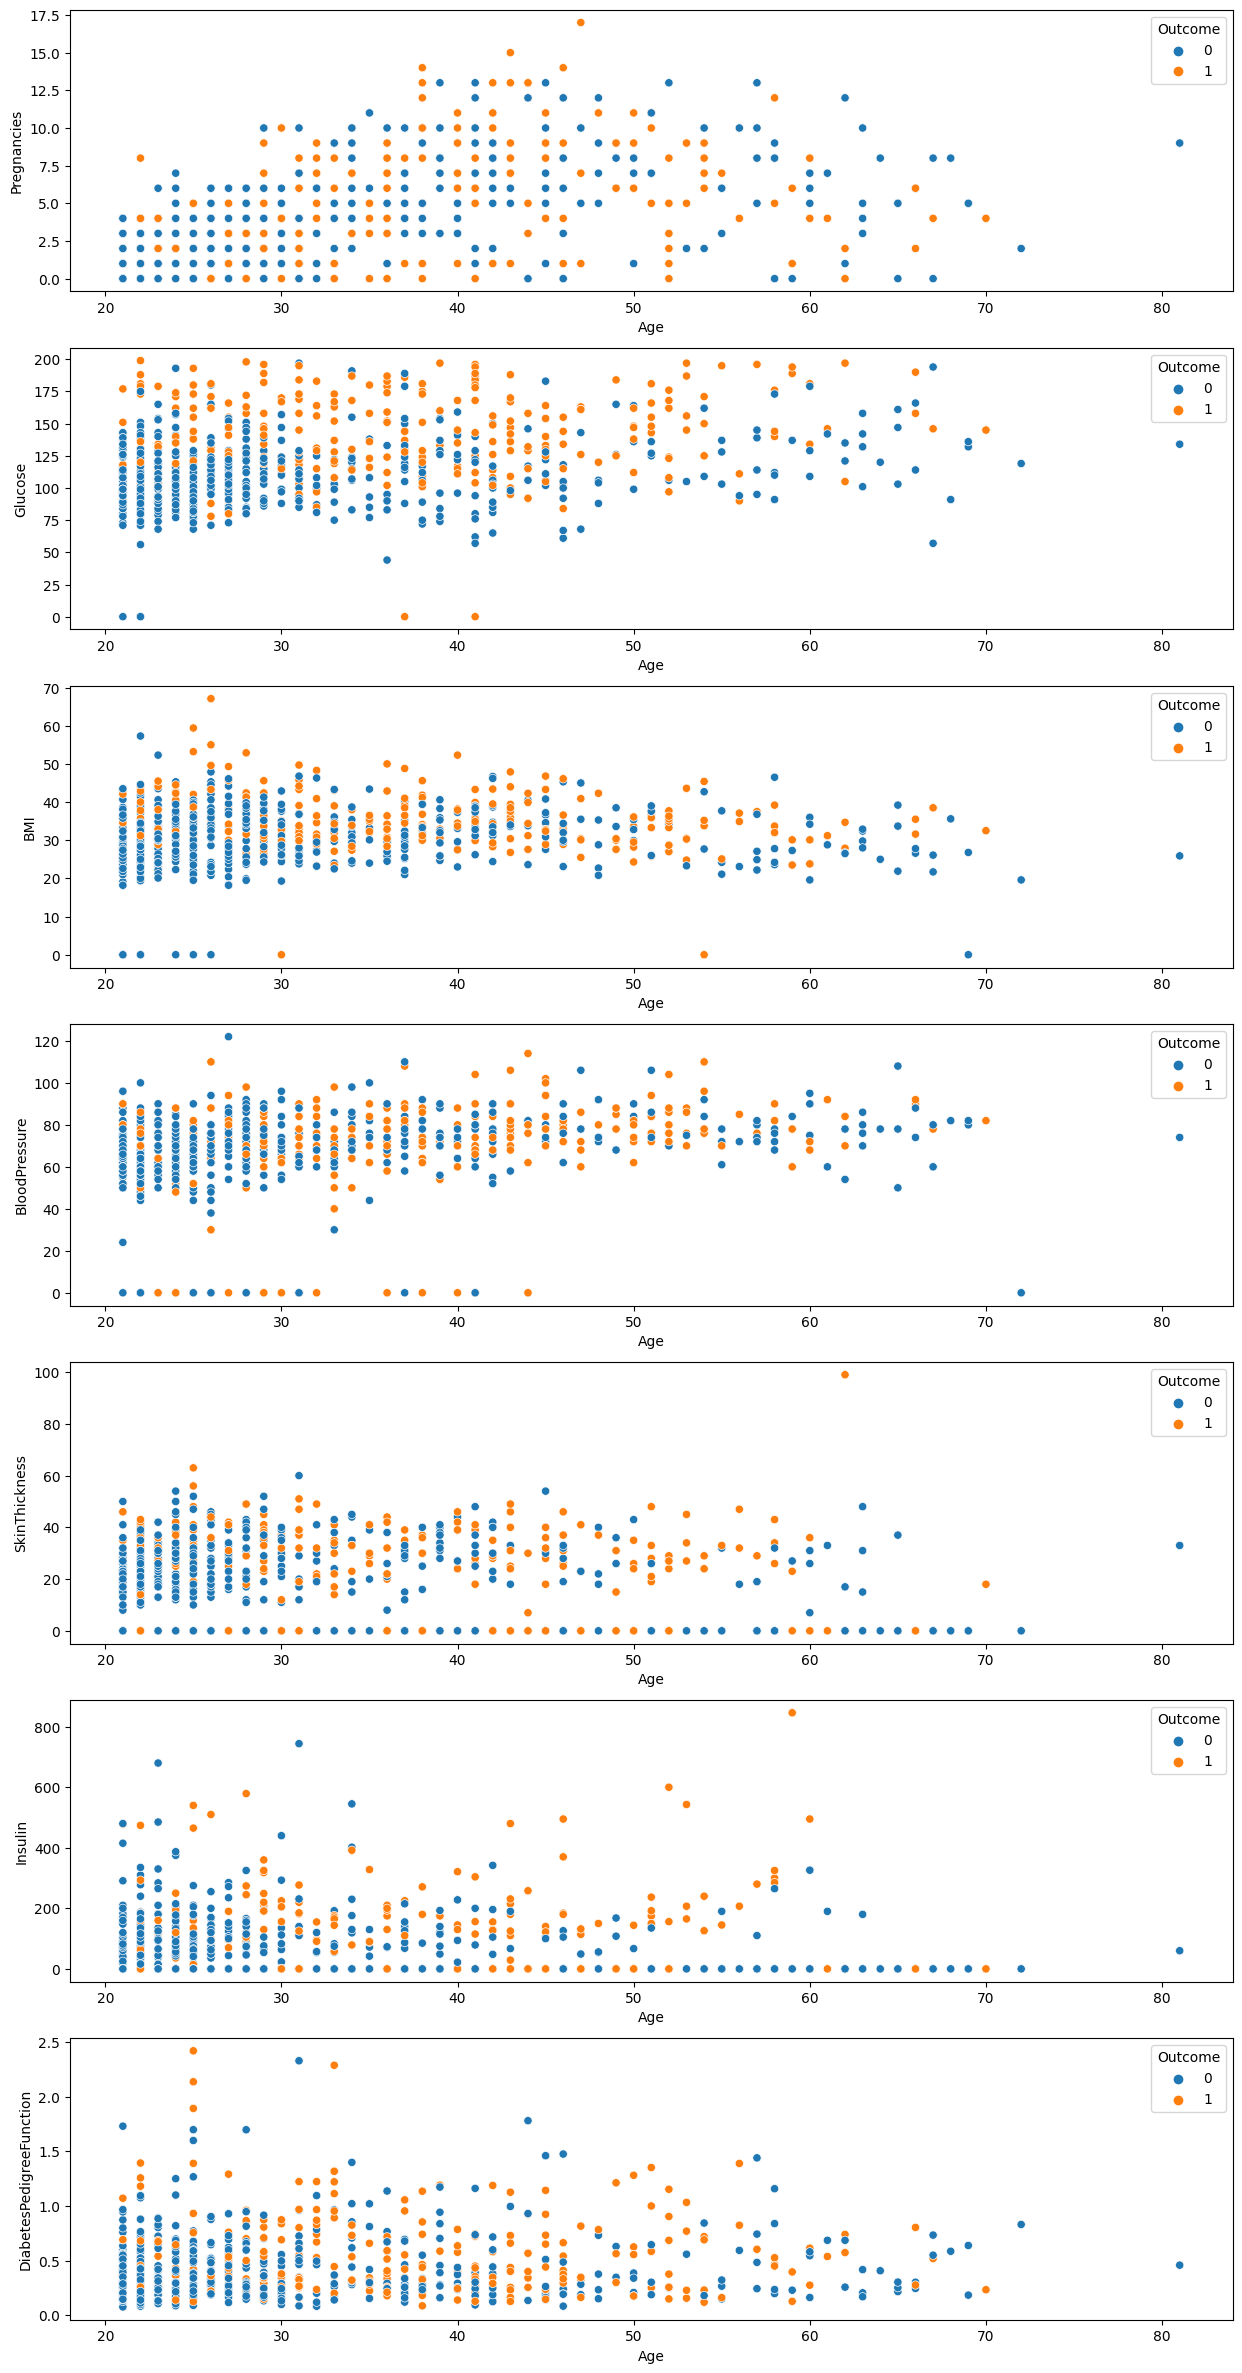

In [6]:
# Data is a bit Unbalanced
fig,ax=plt.subplots(7,1,figsize=(15,30))
sns.scatterplot(data=df,x='Age',y='Pregnancies',hue='Outcome',ax=ax[0])
sns.scatterplot(data=df,x='Age',y='Glucose',hue='Outcome',ax=ax[1])
sns.scatterplot(data=df,x='Age',y='BMI',hue='Outcome',ax=ax[2])
sns.scatterplot(data=df,x='Age',y='BloodPressure',hue='Outcome',ax=ax[3])
sns.scatterplot(data=df,x='Age',y='SkinThickness',hue='Outcome',ax=ax[4])
sns.scatterplot(data=df,x='Age',y='Insulin',hue='Outcome',ax=ax[5])
sns.scatterplot(data=df,x='Age',y='DiabetesPedigreeFunction',hue='Outcome',ax=ax[6])
plt.show()

**Findings**

**Pregnancies vs. Age**

* The number of pregnancies generally increases with age up to around 50 years, after which the frequency decreases.
* Younger individuals (below 30) tend to have fewer pregnancies.
* Diabetic individuals (orange dots) appear more frequently among those with a higher number of pregnancies.
* This suggests that pregnancies may be a contributing factor to diabetes risk.

**Glucose vs. Age**

* Glucose levels are widely spread across all age groups.
* A majority of individuals have glucose levels between 80 and 180.
* Higher glucose levels (above 150) are more commonly associated with diabetic individuals (orange dots).
* Non-diabetic individuals (blue dots) are more frequent in the lower glucose range.
* This confirms that glucose levels are a strong indicator of diabetes risk.

**Diabetes Pedigree Function vs. Age**

* The DPF values are spread across all age groups, with most values concentrated below 1.0.
* Some individuals have exceptionally high DPF values, but they are relatively rare.
* Comparison Between Diabetic (Outcome = 1) and Non-Diabetic (Outcome = 0) 
* Both diabetic and non-diabetic individuals exhibit similar distributions in terms of age and DPF.
* Diabetic individuals (orange dots) tend to have a slightly higher DPF in some cases, but there is no clear boundary separating the two groups.

**Age vs. Skin Thickness:**


* Skin thickness and insulin levels show a wide spread across ages.
* A significant number of individuals have zero insulin values, indicating missing or unrecorded data.
* There is no clear trend of increasing or decreasing skin thickness with age.

**Age vs. Insulin:**


* Insulin values are more scattered, with some very high outliers, particularly in older individuals.
* Both diabetic (orange) and non-diabetic (blue) individuals are distributed throughout, but diabetics tend to have higher insulin levels.

**Age vs. BMI:**


* BMI generally remains consistent across age groups, with higher BMI values appearing in both diabetic and non-diabetic individuals.
* Blood pressure has a wide range, with some individuals showing very high readings.

**Age vs. Blood Pressure:**


* There are some zero values in blood pressure, which might indicate missing or incorrect data.
* Diabetic individuals (orange) are more likely to have higher BMI and blood pressure, but there is a mix in both categories.


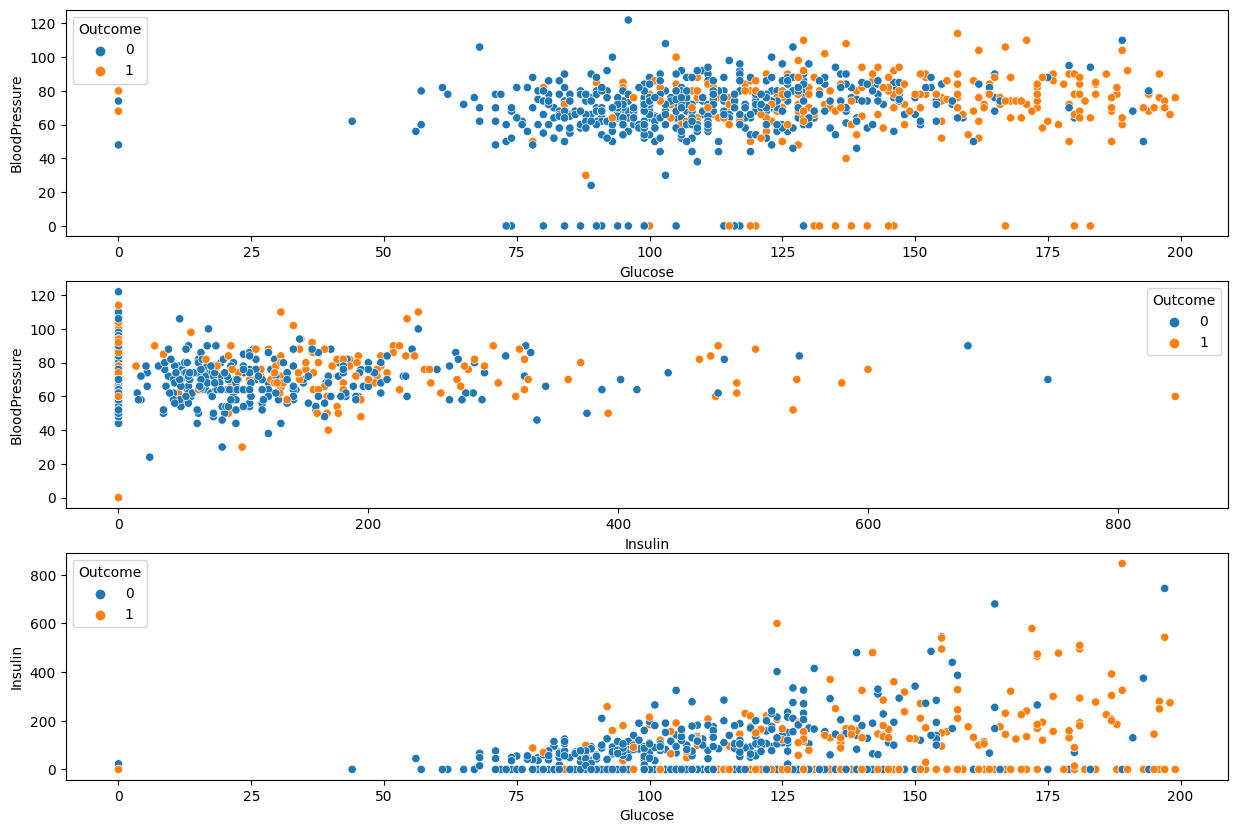

In [7]:
fig,ax=plt.subplots(3,1,figsize=(15,10))
sns.scatterplot(data=df,x='Glucose',y='BloodPressure',hue='Outcome',ax=ax[0])
sns.scatterplot(data=df,x='Insulin',y='BloodPressure',hue='Outcome',ax=ax[1])
sns.scatterplot(data=df,x='Glucose',y='Insulin',hue='Outcome',ax=ax[2])
plt.show()

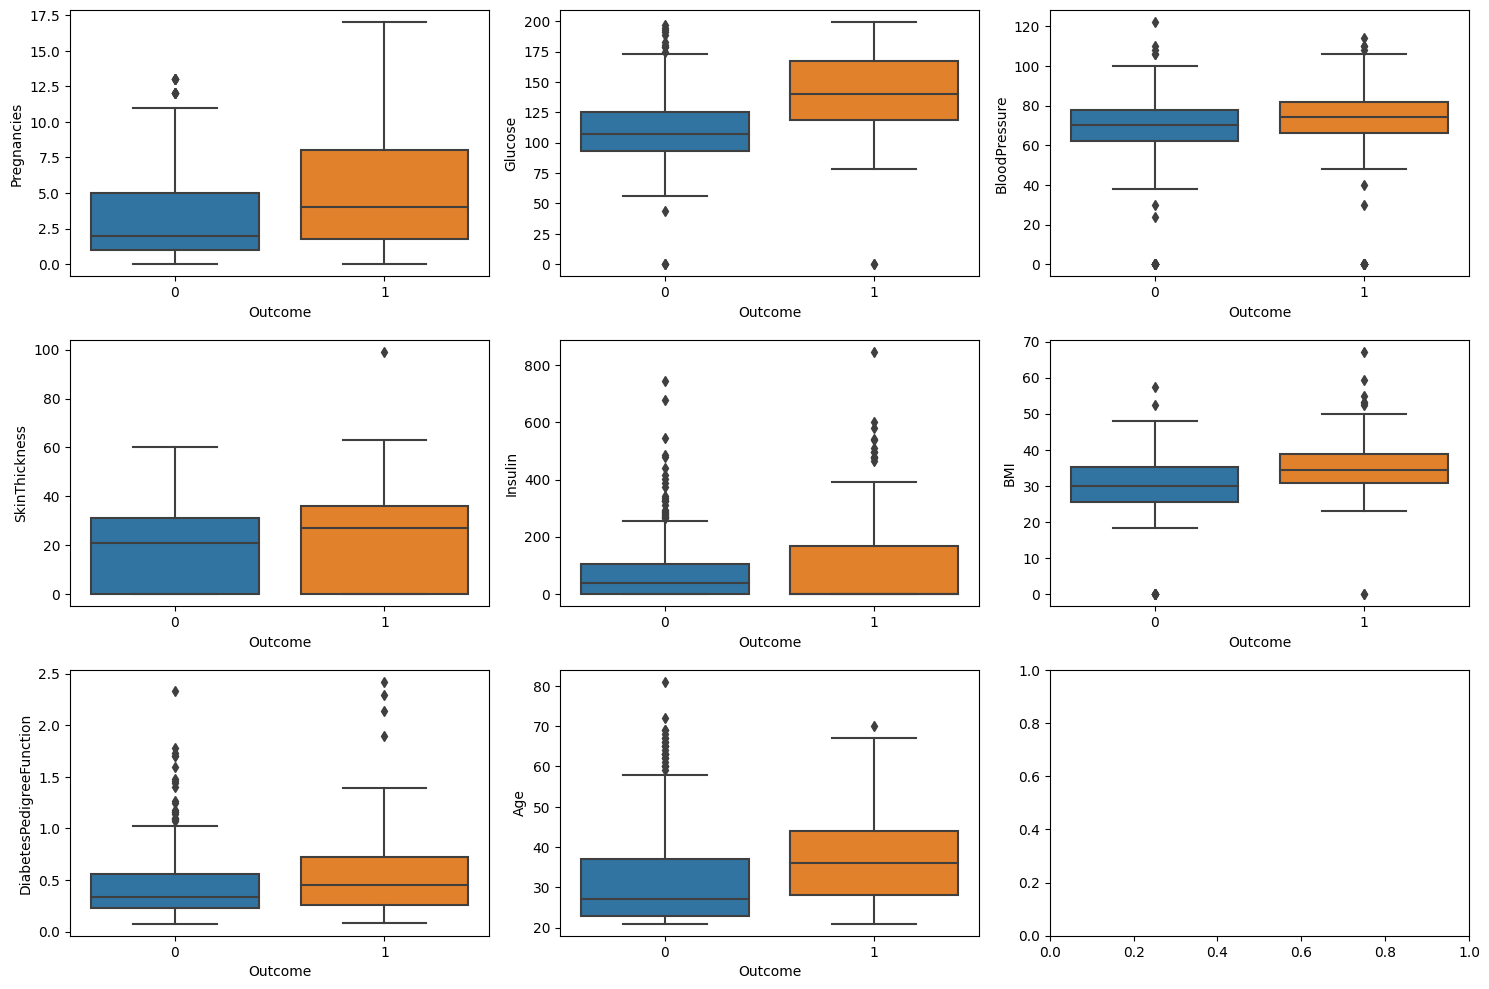

In [8]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
ax=ax.flatten()
i=0
cols = df.columns[df.columns != 'Outcome']
for col in cols:
    sns.boxplot(data=df,y=col,ax=ax[i],x='Outcome')
    i+=1
plt.tight_layout()
plt.show()

****
# Data Preprocessing
****

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# dropping duplicates if any
df.drop_duplicates(inplace=True)

In [11]:
# Cheking for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [12]:
# Currently we do not have any null values
# We can also visualize the null values (if there are any)
# Running the below code will help you visualize it
"""
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

"""

'\nplt.figure(figsize=(15,5))\nsns.heatmap(df.isnull())\nplt.show()\n\n'

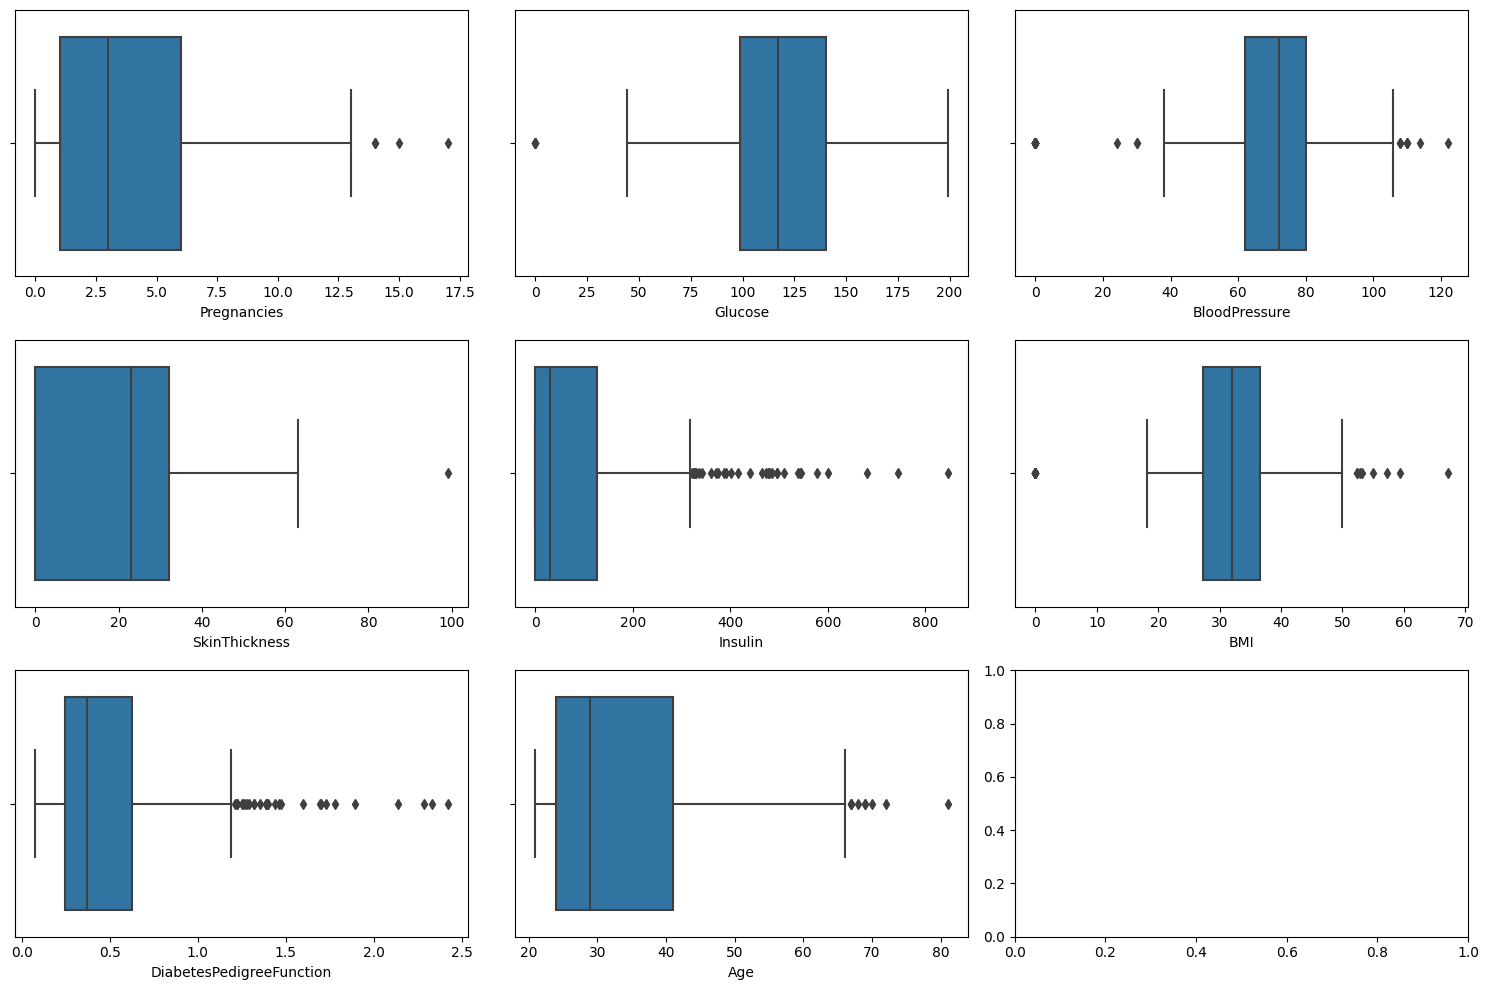

In [13]:
# Let us check for outliers
# We will use boxplots to use check for outliers
fig,ax=plt.subplots(3,3,figsize=(15,10))
ax=ax.flatten()
i=0
cols = df.columns[df.columns != 'Outcome']
for col in cols:
    sns.boxplot(data=df,x=col,ax=ax[i])
    i+=1
plt.tight_layout()
plt.show()

In [14]:
# We can remove these outliers using IQR
# The below is just an example of how it can be done
cols=['Insulin','DiabetesPedigreeFunction']
for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-0.25*iqr
    ub=q3+0.25*iqr
    df = df[(df[col] <= ub) & df[col] >= lb]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               634 non-null    int64  
 1   Glucose                   634 non-null    int64  
 2   BloodPressure             634 non-null    int64  
 3   SkinThickness             634 non-null    int64  
 4   Insulin                   634 non-null    int64  
 5   BMI                       634 non-null    float64
 6   DiabetesPedigreeFunction  634 non-null    float64
 7   Age                       634 non-null    int64  
 8   Outcome                   634 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.5 KB


In [16]:
# Let us Standardize and Normalize the Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
# Let us normalize the Pregnancy Feature and standardize rest of the features
# importing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [18]:
mm=MinMaxScaler()
ss=StandardScaler()

In [19]:
df['Pregnancies']=mm.fit_transform(df['Pregnancies'].values.reshape(-1, 1))
cols=df.columns[(df.columns!='Pregnancies')&(df.columns!='Outcome')]
for col in cols:
    df[col]=ss.fit_transform(df[col].values.reshape(-1, 1))

In [20]:
for col in df.columns[df.columns!='Outcome']:
    print(col,'------''Mean ->',df[col].mean(),'Standard Deviation -> ',df[col].std())

Pregnancies ------Mean -> 0.2543638275499474 Standard Deviation ->  0.2190731351925758
Glucose ------Mean -> 6.164014269212225e-17 Standard Deviation ->  1.0007895776990106
BloodPressure ------Mean -> 3.642372068170861e-17 Standard Deviation ->  1.0007895776990101
SkinThickness ------Mean -> 1.1207298671294955e-16 Standard Deviation ->  1.000789577699012
Insulin ------Mean -> 1.7161176090420402e-17 Standard Deviation ->  1.0007895776990108
BMI ------Mean -> 2.1574049942242789e-16 Standard Deviation ->  1.0007895776990112
DiabetesPedigreeFunction ------Mean -> 8.685656470253591e-17 Standard Deviation ->  1.0007895776990103
Age ------Mean -> -1.6250583073377686e-16 Standard Deviation ->  1.0007895776990103


In [21]:
print("After Scaling/Normalization:")
print(df.describe())  

After Scaling/Normalization:
       Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count   634.000000  6.340000e+02   6.340000e+02   6.340000e+02  6.340000e+02   
mean      0.254364  6.164014e-17   3.642372e-17   1.120730e-16  1.716118e-17   
std       0.219073  1.000790e+00   1.000790e+00   1.000790e+00  1.000790e+00   
min       0.000000 -3.792865e+00  -3.561489e+00  -1.248892e+00 -6.605413e-01   
25%       0.066667 -6.574871e-01  -3.533903e-01  -1.248892e+00 -6.605413e-01   
50%       0.200000 -1.190890e-01   6.055787e-02   1.430014e-01 -6.605413e-01   
75%       0.400000  6.093320e-01   5.779931e-01   7.756804e-01  3.967472e-01   
max       1.000000  2.477890e+00   2.751221e+00   5.014630e+00  6.793343e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  6.340000e+02              6.340000e+02  6.340000e+02  634.000000  
mean   2.157405e-16              8.685656e-17 -1.625058e-16    0.313880  
std    1.000790e+00         

****
# Data Preparation
****

In [22]:
# importing
from sklearn.model_selection import train_test_split

In [23]:
x=df.drop(columns='Outcome')
y=df['Outcome']
X_t,x_te,Y_t,y_te=train_test_split(x,y,test_size=0.2,random_state=20)
print(X_t.shape,x_te.shape,Y_t.shape,y_te.shape)

(507, 8) (127, 8) (507,) (127,)


In [24]:
Y_t.value_counts()

Outcome
0    340
1    167
Name: count, dtype: int64

****
# SMOTE
****

In [25]:
# importing 
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_t,y_t = smote.fit_resample(X_t, Y_t)

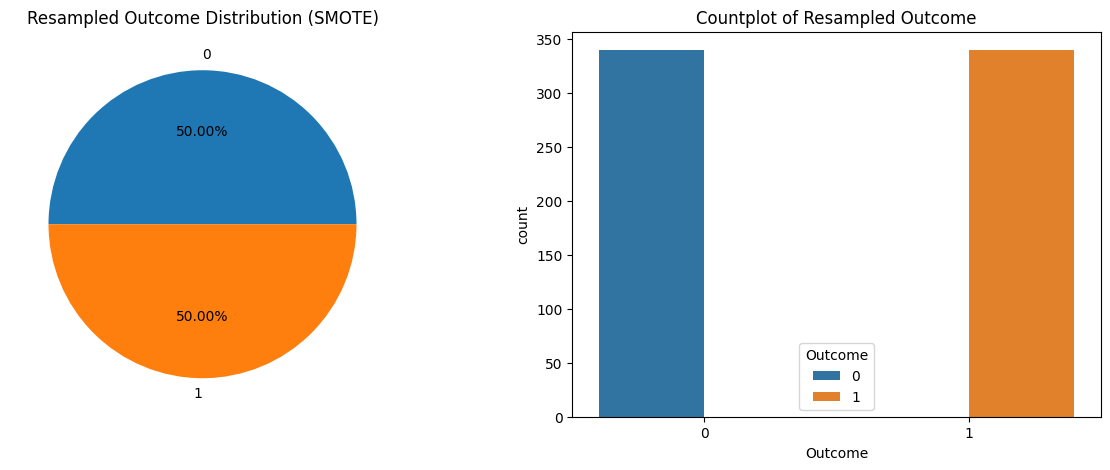

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
tdf_res = pd.DataFrame(y_t, columns=['Outcome']).value_counts().reset_index(name='count')
ax[0].pie(tdf_res['count'], labels=tdf_res['Outcome'], autopct='%.2f%%')
ax[0].set_title('Resampled Outcome Distribution (SMOTE)')
sns.countplot(data=pd.DataFrame(y_t, columns=['Outcome']), x='Outcome', ax=ax[1], hue='Outcome')
ax[1].set_title('Countplot of Resampled Outcome')

plt.show()

****
# Models
****

In [28]:
# importing

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

import keras as k
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from keras.callbacks import Callback

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_curve, auc,roc_auc_score

In [29]:
at=[]
a=[]
pt=[]
p=[]
rt=[]
r=[]
f1t=[]
f1=[]
crt=[]
cr=[]
cmt=[]
cm=[]
roc_auc_t=[]
roc_auc=[]

## Logistic Regression

In [30]:
lr=LogisticRegression()
params={
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
}
nlr=RandomizedSearchCV(lr,cv=10,param_distributions=params,scoring='accuracy',n_jobs=-1,random_state=20)
nlr.fit(x_t,y_t)
print(nlr.best_params_)
print(nlr.best_score_)
nlr=nlr.best_estimator_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.012742749857031334}
0.7529411764705882


In [31]:
predt=nlr.predict(x_t)
pred=nlr.predict(x_te)

In [32]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## KNN

In [33]:
knn=KNeighborsClassifier()
params= {
    'n_neighbors': np.arange(1,31),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'p': [1, 2]  
}
nknn=RandomizedSearchCV(knn,cv=10,param_distributions=params,scoring='accuracy',n_jobs=-1,random_state=20)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_

{'weights': 'distance', 'p': 1, 'n_neighbors': 4, 'metric': 'euclidean'}
0.8323529411764705


In [34]:
predt=nknn.predict(x_t)
pred=nknn.predict(x_te)

In [35]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## Naive Bayes

In [36]:
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10)  # Try different smoothing values
}
gnb = GaussianNB()
ngnb= GridSearchCV(gnb, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
ngnb.fit(x_t, y_t)
print(ngnb.best_params_)
print(ngnb.best_score_)
gnb=ngnb.best_estimator_

{'var_smoothing': 0.1}
0.7352941176470589


In [37]:
predt=ngnb.predict(x_t)
pred=ngnb.predict(x_te)

In [38]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## SVM

In [39]:
svc=SVC()
params={
    'kernel': ['linear', 'poly', 'rbf']}
nsvc=GridSearchCV(svc,params,scoring='accuracy',n_jobs=-1,cv=3)
nsvc.fit(x_t,y_t)
print(nsvc.best_params_)
print(nsvc.best_score_)
nsvc=nsvc.best_estimator_

{'kernel': 'rbf'}
0.7941730666770627


In [40]:
predt=nsvc.predict(x_t)
pred=nsvc.predict(x_te)

In [41]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## Decision Tree

In [42]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas

params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.0017011128775834667}
0.788235294117647


In [43]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,101)),'min_samples_leaf':list(np.arange(2,101)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'min_samples_split': 21, 'min_samples_leaf': 29, 'max_features': None, 'criterion': 'gini'}
0.738235294117647


In [44]:
predt=ndt.predict(x_t)
pred=ndt.predict(x_te)

In [45]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## Random Forest

In [46]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
       'max_features':['sqrt','log2',None],'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',random_state=20)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'log2', 'criterion': 'entropy'}
0.8014705882352942


In [47]:
predt=nrf.predict(x_t)
pred=nrf.predict(x_te)

In [48]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## AdaBoost

In [49]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01),}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)
nada=nada.best_estimator_

{'n_estimators': 1000, 'learning_rate': 0.55}
0.7911764705882353


In [50]:
predt=nada.predict(x_t)
pred=nada.predict(x_te)

In [51]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## GradientBoost

In [52]:
gb=GradientBoostingClassifier()
params={'n_estimators': [1000], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.8, 'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 38, 'max_features': None, 'learning_rate': 0.89}
0.8


In [53]:
ngb=ngb.best_estimator_
predt=nada.predict(x_t)
pred=nada.predict(x_te)

In [54]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## XGBoost

In [55]:
xgb = XGBClassifier()
params= {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'n_estimators': [1000],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 2, 3]
}
nxgb=RandomizedSearchCV(xgb,cv=10,scoring='accuracy',n_jobs=-1,param_distributions=params)
nxgb.fit(x_t,y_t)
print(nxgb.best_params_)
print(nxgb.best_score_)

{'subsample': 0.6, 'scale_pos_weight': 3, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
0.8205882352941176


In [56]:
nxgb=nxgb.best_estimator_
predt=nxgb.predict(x_t)
pred=nxgb.predict(x_te)

In [57]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

## ANN

In [58]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=8))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
opt=k.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [60]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}: {logs}")

modelh = model.fit(x_t, y_t, epochs=200, verbose=0, callbacks=[CustomCallback()])
pred_probs = model.predict(x_te)
pred = (pred_probs > 0.5).astype(int)
pred_probs = model.predict(x_t)
predt = (pred_probs > 0.5).astype(int)

Epoch 50: {'accuracy': 0.8691176176071167, 'loss': 0.3060459792613983}
Epoch 100: {'accuracy': 0.8779411911964417, 'loss': 0.28699448704719543}
Epoch 150: {'accuracy': 0.908823549747467, 'loss': 0.21213273704051971}
Epoch 200: {'accuracy': 0.9220588207244873, 'loss': 0.2084515541791916}
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [61]:
at.append(accuracy_score(y_t,predt))
a.append(accuracy_score(y_te,pred))
pt.append(precision_score(y_t,predt))
p.append(precision_score(y_te,pred))
rt.append(recall_score(y_t,predt))
r.append(recall_score(y_te,pred))
f1t.append(f1_score(y_t,predt))
f1.append(f1_score(y_te,pred))
crt.append(classification_report(y_t,predt))
cr.append(classification_report(y_te,pred))
cmt.append(confusion_matrix(y_t,predt))
cm.append(confusion_matrix(y_te,pred))
roc_auct = roc_auc_score(y_t, predt)
roc_au = roc_auc_score(y_te, pred)
roc_auc_t.append(roc_auct)
roc_auc.append(roc_au)

****
# Evaluation Metrics
****

## Training 

In [62]:
mods=['Logistic Regression','KNN','Naive Bayes','SVM','Decision Tree','Random Forest','AdaBoost','GradientBoost','XGBoost','ANN']
print('CLASSIFICATION REPORTS:\n\n\n')
for m,c in zip(mods,crt):
    print(m,'\n',c,'\n\n')

CLASSIFICATION REPORTS:



Logistic Regression 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       340
           1       0.77      0.72      0.75       340

    accuracy                           0.75       680
   macro avg       0.75      0.75      0.75       680
weighted avg       0.75      0.75      0.75       680
 


KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       340

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680
 


Naive Bayes 
               precision    recall  f1-score   support

           0       0.72      0.80      0.75       340
           1       0.77      0.69      0.73       340

    accuracy                           0.74       680
   macro avg       0.74      0.74      0.74       680

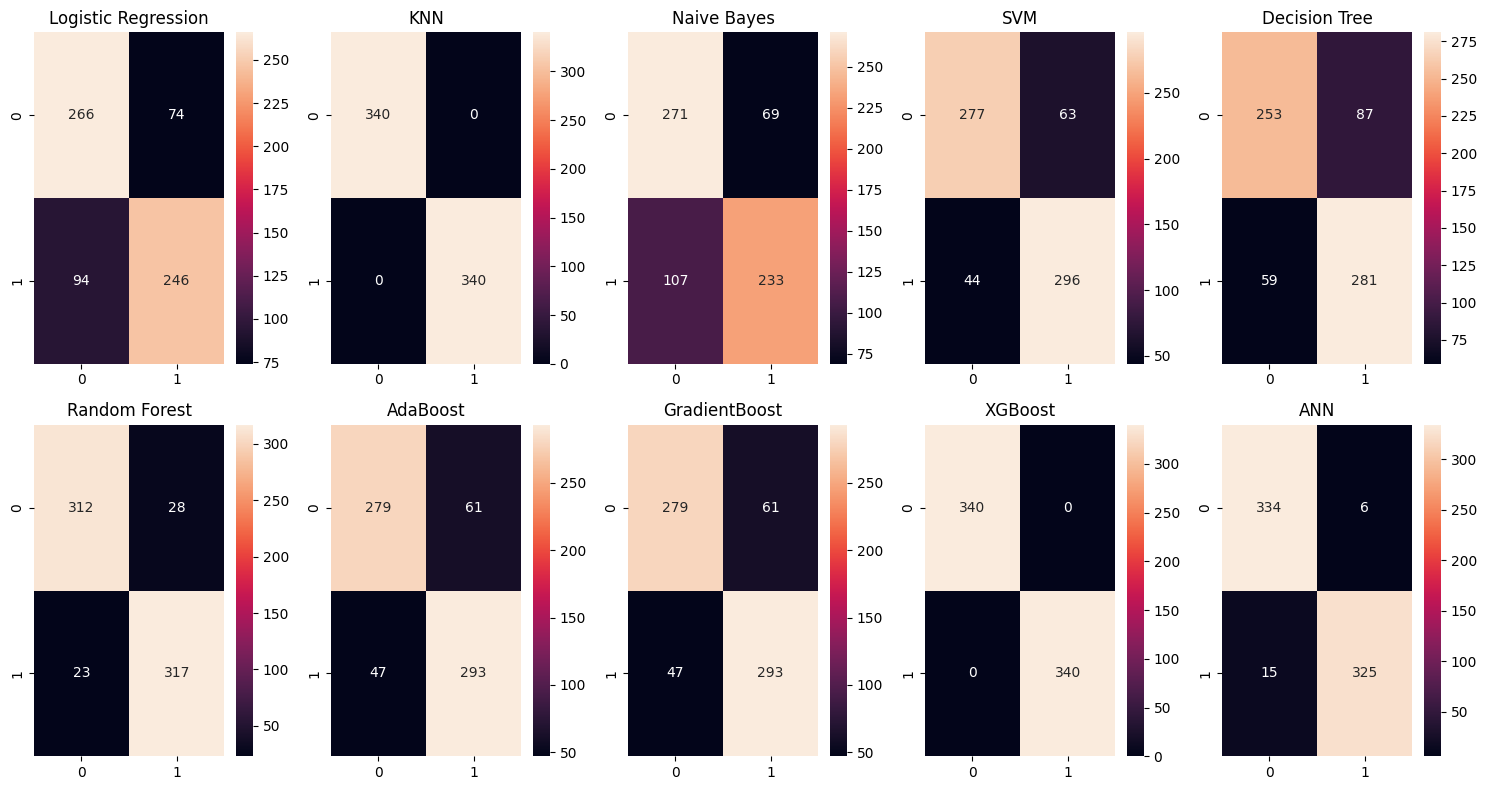

In [63]:
fig,ax=plt.subplots(2,5,figsize=(15,8))
ax=ax.flatten()
i=0
for m,c in zip(mods,cmt):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [64]:
tr=pd.DataFrame({'Models':mods,'ROC AUC':roc_auc,'Accuracy':at,'Precision':pt,'Recall':rt,'F1 Score':f1t})
tr.sort_values(by=['ROC AUC','Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,ROC AUC,Accuracy,Precision,Recall,F1 Score
5,Random Forest,0.800987,0.925000,0.918841,0.932353,0.925547
6,AdaBoost,0.790461,0.841176,0.827684,0.861765,0.844380
7,GradientBoost,0.790461,0.841176,0.827684,0.861765,0.844380
2,Naive Bayes,0.780263,0.741176,0.771523,0.685294,0.725857
3,SVM,0.774836,0.842647,0.824513,0.870588,0.846924
0,Logistic Regression,0.764474,0.752941,0.768750,0.723529,0.745455
8,XGBoost,0.743421,1.000000,1.000000,1.000000,1.000000
4,Decision Tree,0.727632,0.785294,0.763587,0.826471,0.793785
1,KNN,0.696382,1.000000,1.000000,1.000000,1.000000
9,ANN,0.639803,0.969118,0.981873,0.955882,0.968703


## Testing

In [65]:
mods=['Logistic Regression','KNN','Naive Bayes','SVM','Decision Tree','Random Forest','AdaBoost','GradientBoost','XGBoost','ANN']
print('CLASSIFICATION REPORTS:\n\n\n')
for m,c in zip(mods,cr):
    print(m,'\n',c,'\n\n')

CLASSIFICATION REPORTS:



Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        95
           1       0.53      0.75      0.62        32

    accuracy                           0.77       127
   macro avg       0.72      0.76      0.73       127
weighted avg       0.81      0.77      0.78       127
 


KNN 
               precision    recall  f1-score   support

           0       0.87      0.71      0.78        95
           1       0.44      0.69      0.54        32

    accuracy                           0.70       127
   macro avg       0.66      0.70      0.66       127
weighted avg       0.76      0.70      0.72       127
 


Naive Bayes 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        95
           1       0.57      0.75      0.65        32

    accuracy                           0.80       127
   macro avg       0.74      0.78      0.75       127

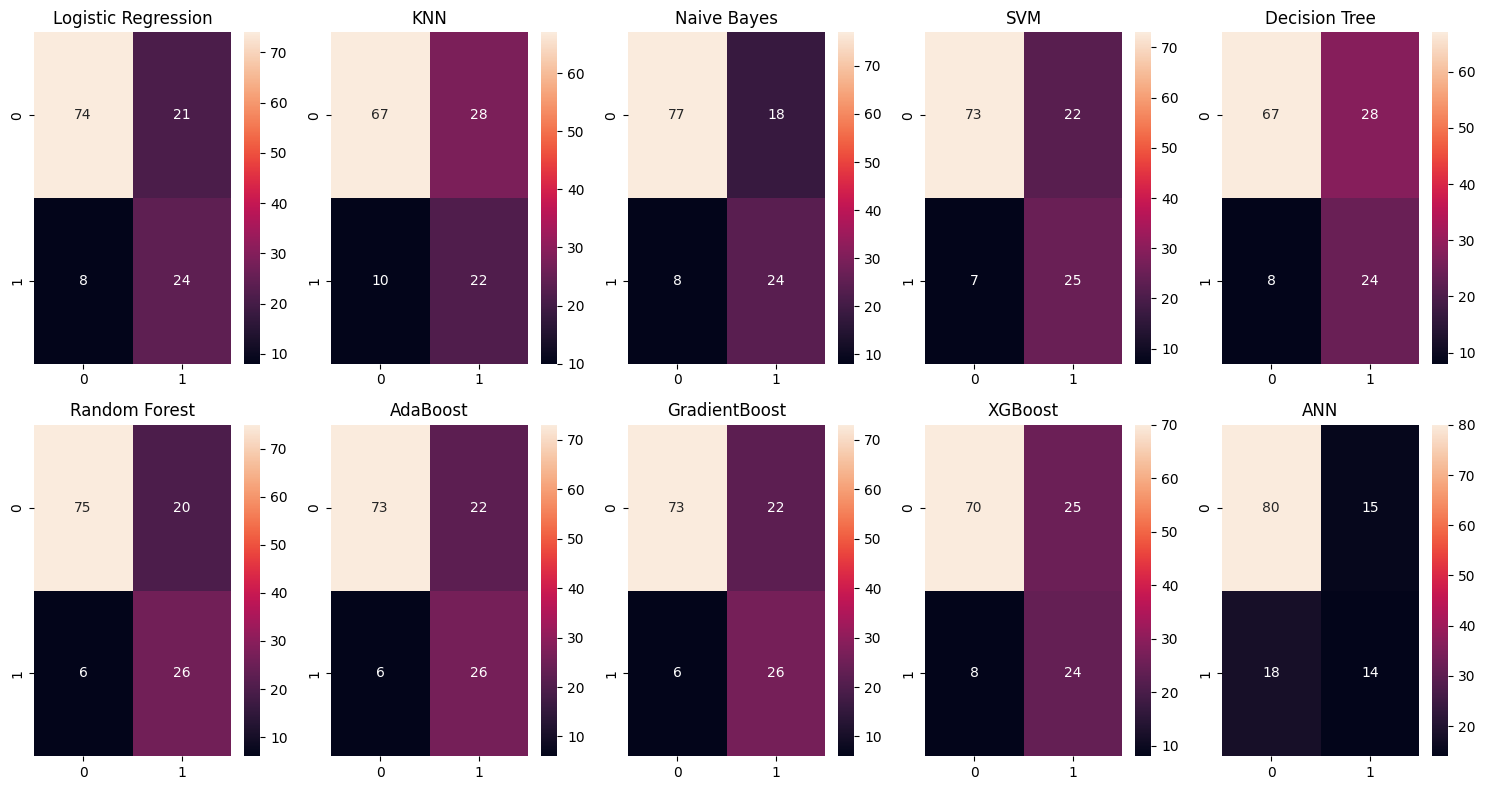

In [66]:
fig,ax=plt.subplots(2,5,figsize=(15,8))
ax=ax.flatten()
i=0
for m,c in zip(mods,cm):
    sns.heatmap(c,annot=True,ax=ax[i],fmt='d')
    ax[i].set_title(m)
    i+=1
plt.tight_layout()
plt.show()

In [67]:
te=pd.DataFrame({'Models':mods,'ROC AUC':roc_auc,'Accuracy':a,'Precision':p,'Recall':r,'F1 Score':f1})
te.sort_values(by=['ROC AUC','Accuracy','Precision','Recall','F1 Score'],ascending=False)

,Models,ROC AUC,Accuracy,Precision,Recall,F1 Score
5,Random Forest,0.800987,0.795276,0.565217,0.81250,0.666667
6,AdaBoost,0.790461,0.779528,0.541667,0.81250,0.650000
7,GradientBoost,0.790461,0.779528,0.541667,0.81250,0.650000
2,Naive Bayes,0.780263,0.795276,0.571429,0.75000,0.648649
3,SVM,0.774836,0.771654,0.531915,0.78125,0.632911
0,Logistic Regression,0.764474,0.771654,0.533333,0.75000,0.623377
8,XGBoost,0.743421,0.740157,0.489796,0.75000,0.592593
4,Decision Tree,0.727632,0.716535,0.461538,0.75000,0.571429
1,KNN,0.696382,0.700787,0.440000,0.68750,0.536585
9,ANN,0.639803,0.740157,0.482759,0.43750,0.459016


****
# ROC Curve
****

Processing Logistic Regression...
Processing KNN...
Processing SVM...
Processing Decision Tree...
Processing Random Forest...
Processing AdaBoost...
Processing GradientBoost...
Processing XGBoost...
Processing ANN...


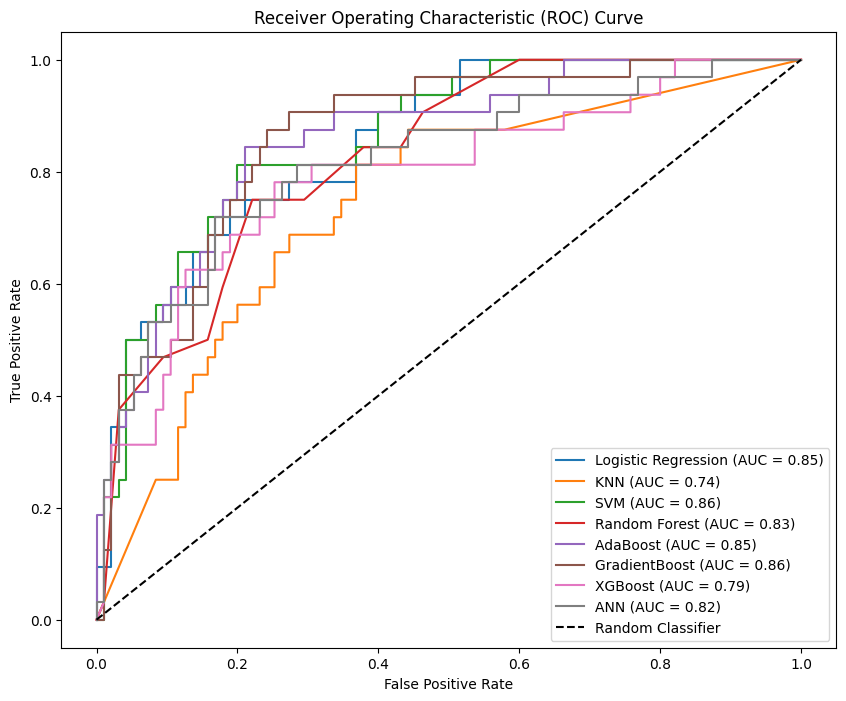

In [68]:
from sklearn.inspection import permutation_importance
import shap

models = [nlr, nknn, ngnb, nsvc, ndt, nrf, nada, ngb, nxgb, model]
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'AdaBoost', 
               'GradientBoost', 'XGBoost', 'ANN']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    
    print(f"Processing {name}...")

    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(x_te)[:, 1]
        fpr, tpr, _ = roc_curve(y_te, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


****
# Feedback and Suggestions #
****

**Kindly Provide suggestions and Feedback to improve this notebook**

**If you liked this notebook or if you found it helpful kindly Upvote :)**